In [1]:
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

np.random.seed(7)

Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X type:', X_train.dtype)
print('Y type:', X_train.dtype)
print('X_train.shape =', X_train.shape)
print('Y_train.shape =', Y_train.shape)
print('X_test.shape =', X_test.shape)
print('Y_test.shape =', Y_test.shape)

X type: uint8
Y type: uint8
X_train.shape = (60000, 28, 28)
Y_train.shape = (60000,)
X_test.shape = (10000, 28, 28)
Y_test.shape = (10000,)


In [3]:
def image_label(i):
    print('X_train[%d] =' %i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.show()
    print('Y_train[%d] = %d' %(i, Y_train[i]))

X_train[100] =


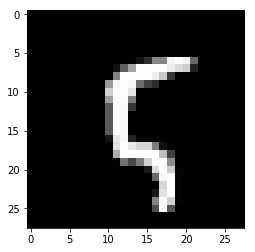

Y_train[100] = 5


In [4]:
image_label(100)

In [5]:
def label_counts(Y):
    counts = np.unique(Y, return_counts=True)
    plt.bar(counts[0], counts[1])
    plt.xticks(range(len(counts[0])))
    plt.show()

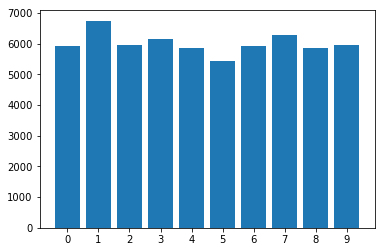

In [6]:
label_counts(Y_train)

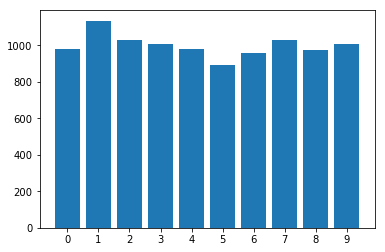

In [7]:
label_counts(Y_test)

In [8]:
n_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(-1, n_pixels)
X_test = X_test.reshape(-1, n_pixels)
print('X_train.shape =', X_train.shape)
print('X_test.shape =', X_test.shape)

X_train.shape = (60000, 784)
X_test.shape = (10000, 784)


In [9]:
np.unique(X_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [10]:
X_train = X_train / X_train.max()
X_train = X_train.astype('float64')
X_test = X_test / X_test.max()
X_test = X_test.astype('float64')

In [11]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
n_labels = Y_train.shape[1]
print('Y_train.shape =', Y_train.shape)
print('Y_test.shape =', Y_test.shape)

Y_train.shape = (60000, 10)
Y_test.shape = (10000, 10)


In [12]:
Y_train[100]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [13]:
model = Sequential()
model.add(Dense(200, input_dim=n_pixels, activation='relu', name='hidden'))
model.add(Dense(n_labels, activation='softmax', name='output'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 200)               157000    
_________________________________________________________________
output (Dense)               (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=100, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s - loss: 0.3050 - acc: 0.9147 - val_loss: 0.1675 - val_acc: 0.9512
Epoch 2/10
60000/60000 [==============================] - 3s - loss: 0.1377 - acc: 0.9603 - val_loss: 0.1081 - val_acc: 0.9670
Epoch 3/10
60000/60000 [==============================] - 3s - loss: 0.0938 - acc: 0.9723 - val_loss: 0.0969 - val_acc: 0.9704
Epoch 4/10
60000/60000 [==============================] - 3s - loss: 0.0699 - acc: 0.9798 - val_loss: 0.0885 - val_acc: 0.9743
Epoch 5/10
60000/60000 [==============================] - 3s - loss: 0.0546 - acc: 0.9843 - val_loss: 0.0762 - val_acc: 0.9759
Epoch 6/10
60000/60000 [==============================] - 4s - loss: 0.0432 - acc: 0.9875 - val_loss: 0.0688 - val_acc: 0.9785
Epoch 7/10
60000/60000 [==============================] - 3s - loss: 0.0359 - acc: 0.9899 - val_loss: 0.0733 - val_acc: 0.9773
Epoch 8/10
60000/60000 [==============================] - 4s 

In [15]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print('test loss =', scores[0])
print('test accuracy =', scores[1])

test loss = 0.0671964239501
test accuracy = 0.9792


dict_keys(['val_acc', 'acc', 'val_loss', 'loss'])


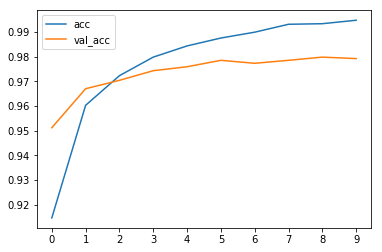

In [16]:
print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.xticks(range(len(history.history['acc'])))
plt.show()

In [17]:
model.predict(X_test[0].reshape(1, n_pixels))

array([[  1.58197281e-06,   6.99549787e-08,   4.57931237e-05,
          5.89901721e-03,   5.74782888e-10,   4.99687894e-06,
          5.60259695e-12,   9.93896425e-01,   2.30565311e-05,
          1.29068983e-04]], dtype=float32)

In [18]:
def image_label_predict(i):
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
    label = np.argmax(Y_test[i])
    predict = np.argmax(model.predict(X_test[i].reshape(1, n_pixels)))
    plt.title('image[%d]: label=%d, predict=%d' %(i, label, predict))
    plt.show()
    return 

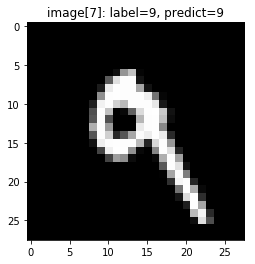

In [19]:
image_label_predict(7)

In [20]:
from sklearn.metrics import confusion_matrix

Y_predict = model.predict(X_test)
Y_predict = np.argmax(Y_predict, axis=1)
Y_test = np.argmax(Y_test, axis=1)

cm = confusion_matrix(Y_test, Y_predict)
print(cm)

In [23]:
import pandas as pd

df_confusion = pd.DataFrame(cm, index=range(10), columns=range(10))
df_confusion

,0,1,2,3,4,5,6,7,8,9
0,970,0,1,1,1,2,2,1,2,0
1,1,1127,3,0,0,1,2,0,1,0
2,2,3,1006,5,4,1,2,3,5,1
3,0,0,3,996,0,1,0,2,2,6
4,2,0,1,1,970,0,2,1,0,5
5,3,0,0,8,1,871,4,0,3,2
6,5,3,2,1,6,7,932,0,2,0
7,2,7,7,5,5,0,0,993,0,9
8,2,0,2,9,8,4,0,1,943,5
9,2,3,0,4,9,4,0,1,2,984


In [ ]:
# Let's find the off-diagnoal elements and see what they look like :)